## CE9010: Introduction to Data Analysis
## Semester 2 2018/19
## Xavier Bresson
<hr>

## Tutorial 5: Supervised classification - improving capacity learning
## Objectives
### $\bullet$ Code linear and higher-order logistic regression models
### $\bullet$ Explore results
<hr>

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1.1 Load dataset #1
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$. <br>
The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.<br>
Hint: You may use matplotlib function `scatter(x,y)`.

Number of training data= 1000
[[ 0.83159 -0.33906  0.     ]
 [ 0.87196  0.24418  0.     ]
 [ 1.01934  0.23241  0.     ]
 [ 1.09207  0.39539  0.     ]
 [ 1.2249   0.20577  0.     ]
 [ 0.73857  0.2535   0.     ]
 [ 1.31868  0.14831  0.     ]
 [ 0.97316  0.27317  0.     ]
 [ 0.98258  0.42117  0.     ]
 [ 0.62744  0.31469  0.     ]]
(1000, 3)
float64


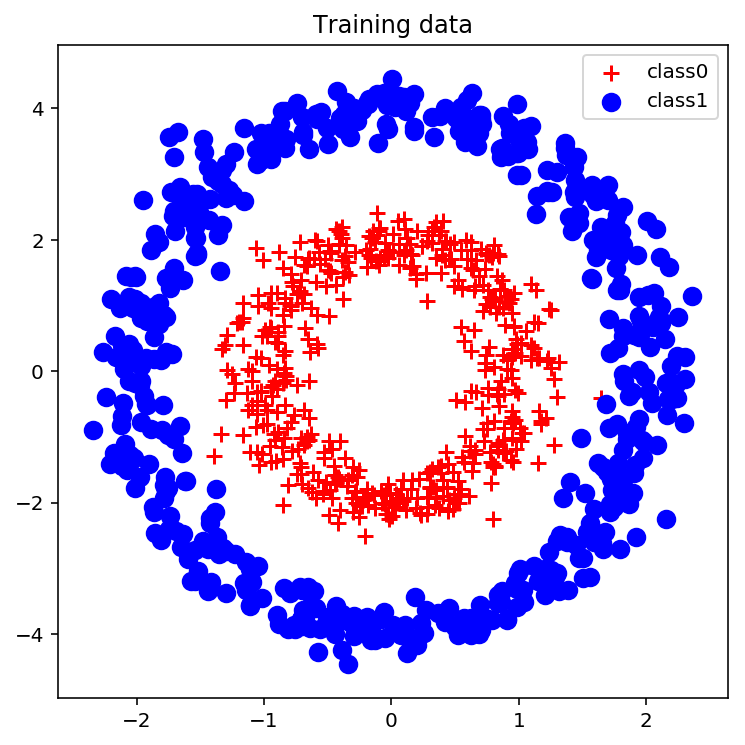

In [4]:
# import data with numpy
data = np.loadtxt('data/two_circles.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of training data=',n)

# print
print(data[:10,:])
print(data.shape)
print(data.dtype)

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (data[:,2]==0) # index of class0
idx_class1 = (data[:,2]==1) # index of class1

plt.figure(1,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', linewidths=2, label='class0') #YOUR CODE HERE
plt.scatter(x1[idx_class1], x2[idx_class1], s=60, c='b', marker='o', linewidths=2, label='class1') #YOUR CODE HERE
plt.title('Training data')
plt.legend()
plt.show()

## 1.2 Linear logistic regression/classification task.
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

In the case of **linear** prediction, we have:

<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Implement the linear logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.693. <br>

(1000, 3)
[[ 1.       0.83159 -0.33906]
 [ 1.       0.87196  0.24418]
 [ 1.       1.01934  0.23241]
 [ 1.       1.09207  0.39539]
 [ 1.       1.2249   0.20577]]
(3, 1)
(1000, 1)
[[0.69314718]]
Time= 0.06629610061645508
0.6931457284529408
[[ 2.81264126e-06]
 [-1.63426116e-03]
 [-3.12077568e-04]]


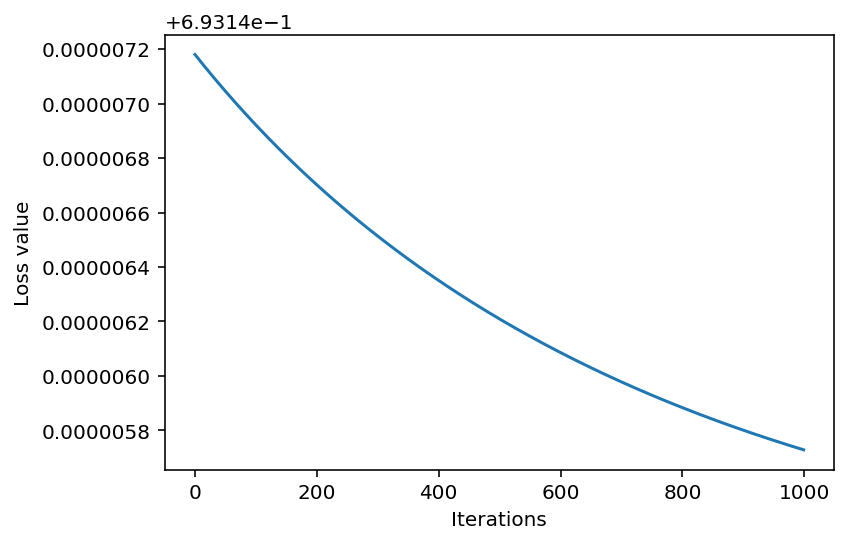

In [7]:
#YOUR CODE HERE


def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) #YOUR CODE HERE
    return sigmoid_f 

# construct the data matrix X
n = data.shape[0]
X = np.ones([n,3]) 
X[:,1:3] = data[:,0:2]
print(X.shape)
print(X[:5,:])

# parameters vector
w = np.array([0,0,0])[:,None] # [:,None] adds a singleton dimension
print(w.shape)


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w)) #YOUR CODE HERE
    return p

# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = -1/n* ( y.T.dot(np.log(y_pred)) + (1-y).T.dot(np.log(1-y_pred)) ) #YOUR CODE HERE
    return loss


# Test loss function 
y = data[:,2][:,None] # label 
print(y.shape)
#print(y)
y_pred = f_pred(X,w) # prediction
loss = loss_logreg(y_pred,y)
print(loss)

# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 2/n* X.T.dot(y_pred-y) #YOUR CODE HERE
    return grad


# gradient descent function definition
def grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function  #YOUR CODE HERE
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss #YOUR CODE HERE
        w = w - tau* grad_f # update rule of gradient descent #YOUR CODE HERE
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm
start = time.time()
w_init = np.array([0,0,0])[:,None]
tau = 1e-3; max_iter = 1000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()



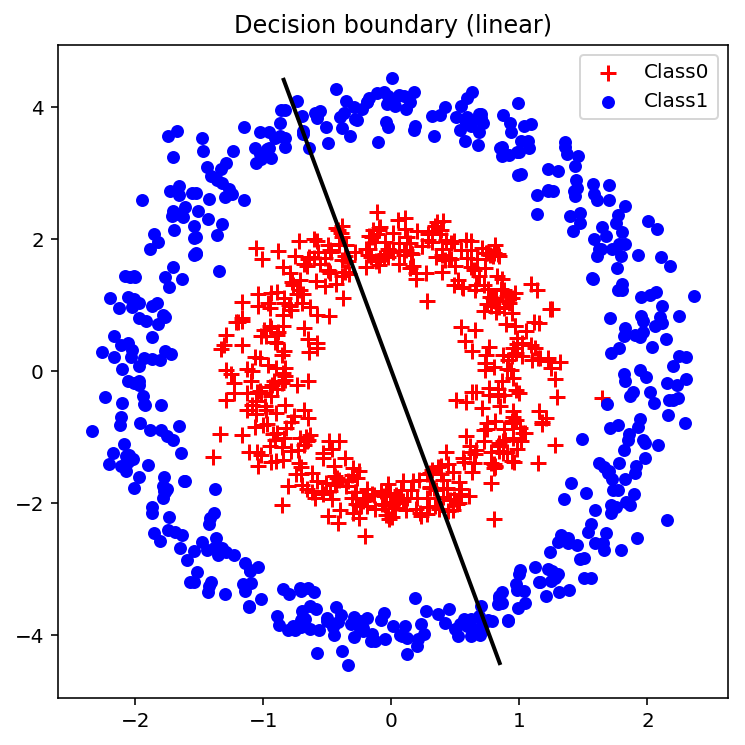

In [8]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()


## 1.3 Quadratic logistic regression/classification task.
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

In the case of **quadratic** prediction, we have:

<br>
$$
X = 
\left[ 
\begin{array}{cccccc}
1 & x_{1(1)} & x_{1(2)} & x_{1(1)}^2 & x_{1(2)}^2 & x_{1(1)}x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} & x_{2(1)}^2 & x_{2(2)}^2 & x_{2(1)}x_{2(2)}\\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} & x_{n(1)}^2 & x_{n(2)}^2 & x_{n(1)}x_{n(2)}
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2\\ 
w_3\\ 
w_4\\ 
w_5
\end{array} 
\right]
\quad
$$

Implement the quadratic logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.011. <br>

(1000, 6)
[[ 1.          0.83159    -0.33906     0.69154193  0.11496168 -0.28195891]
 [ 1.          0.87196     0.24418     0.76031424  0.05962387  0.21291519]
 [ 1.          1.01934     0.23241     1.03905404  0.05401441  0.23690481]
 [ 1.          1.09207     0.39539     1.19261688  0.15633325  0.43179356]
 [ 1.          1.2249      0.20577     1.50038001  0.04234129  0.25204767]]
(6, 1)
Time= 0.3056011199951172
0.05452677210927984
[[-5.27055943]
 [ 0.00653733]
 [-0.00549857]
 [ 2.24715422]
 [ 0.62168741]
 [-0.02115455]]


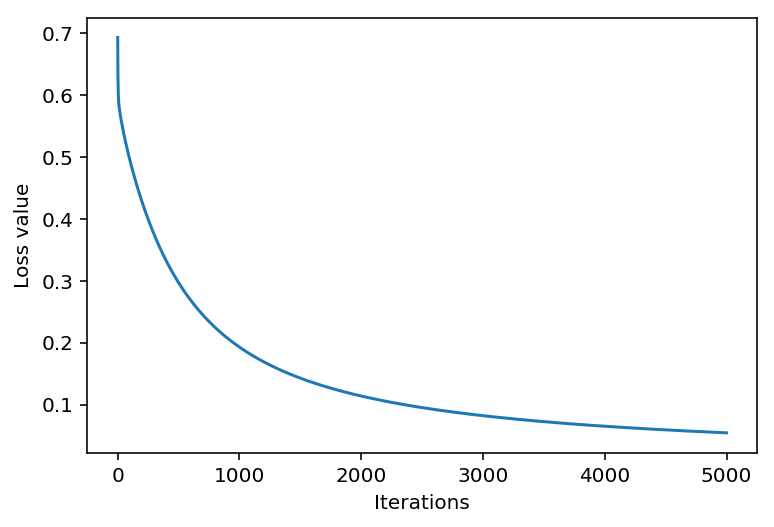

In [16]:
#YOUR CODE HERE


# construct the data matrix X
n = data.shape[0]
X = np.ones([n,6]) 
X[:,1:3] = data[:,0:2]
X[:,3] = data[:,0]**2
X[:,4] = data[:,1]**2
X[:,5] = data[:,0]*data[:,1]
print(X.shape)
print(X[:5,:])

# parameters vector
w = np.array([0,0,0,0,0,0])[:,None] # [:,None] adds a singleton dimension
print(w.shape)



# run gradient descent algorithm
start = time.time()
w_init = w
tau = 1e-2; max_iter = 5000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


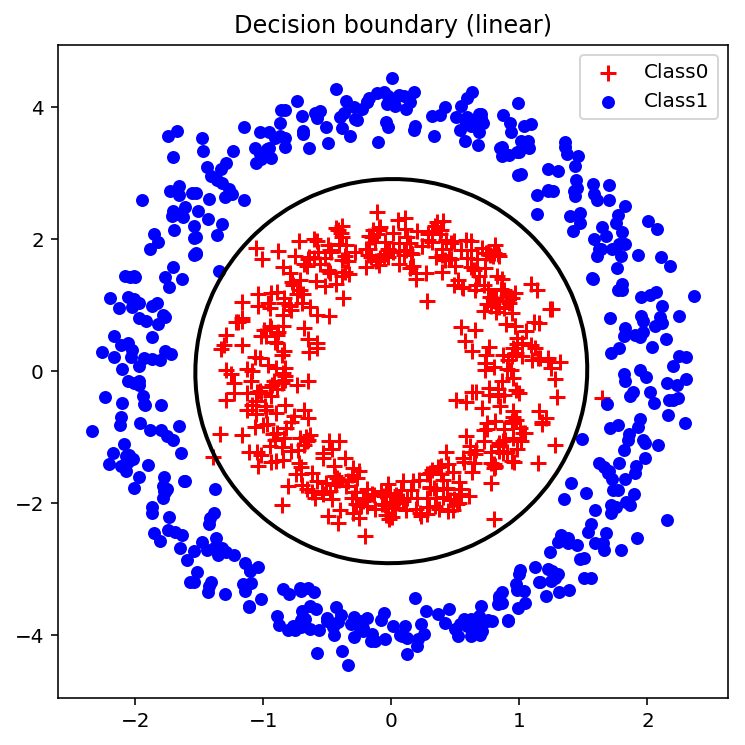

In [17]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),6]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = xx1.reshape(-1)**2
X2[:,4] = xx2.reshape(-1)**2
X2[:,5] = xx1.reshape(-1)*(xx2.reshape(-1))
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()


## 2.1 Load dataset #2
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$. <br>
The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.<br>
Hint: You may use matplotlib function `scatter(x,y)`.

Number of training data= 1000
[[ 0.7609  -0.03701  0.     ]
 [ 1.13638 -0.00651  0.     ]
 [ 1.0643  -0.06773  0.     ]
 [ 0.89776  0.09081  0.     ]
 [ 1.00726 -0.05074  0.     ]
 [ 1.01348  0.0948   0.     ]
 [ 0.9833   0.03865  0.     ]
 [ 1.06511  0.17717  0.     ]
 [ 1.08636  0.19087  0.     ]
 [ 0.87466  0.05625  0.     ]]
(1000, 3)
float64


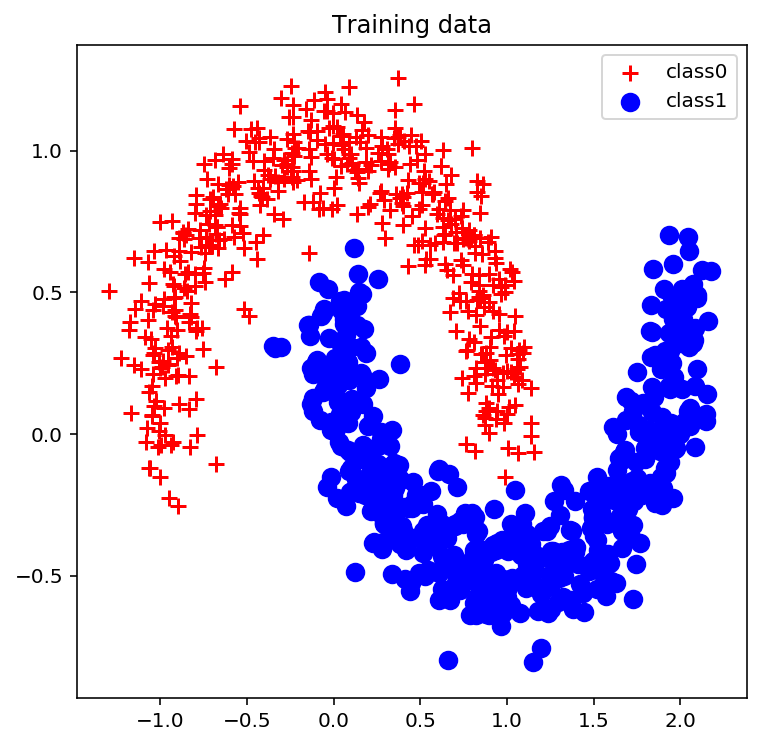

In [18]:
# import data with numpy
data = np.loadtxt('data/two_moons.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of training data=',n)

# print
print(data[:10,:])
print(data.shape)
print(data.dtype)

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (data[:,2]==0) # index of class0
idx_class1 = (data[:,2]==1) # index of class1

plt.figure(1,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', linewidths=2, label='class0') #YOUR CODE HERE
plt.scatter(x1[idx_class1], x2[idx_class1], s=60, c='b', marker='o', linewidths=2, label='class1') #YOUR CODE HERE
plt.title('Training data')
plt.legend()
plt.show()

## 2.2 Linear logistic regression/classification task.
<hr>


Implement the linear logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.255. <br>

(1000, 3)
[[ 1.       0.7609  -0.03701]
 [ 1.       1.13638 -0.00651]
 [ 1.       1.0643  -0.06773]
 [ 1.       0.89776  0.09081]
 [ 1.       1.00726 -0.05074]]
(3, 1)
Time= 0.29139184951782227
0.2651342974355268
[[ 0.3216135 ]
 [ 1.25243194]
 [-4.0301083 ]]


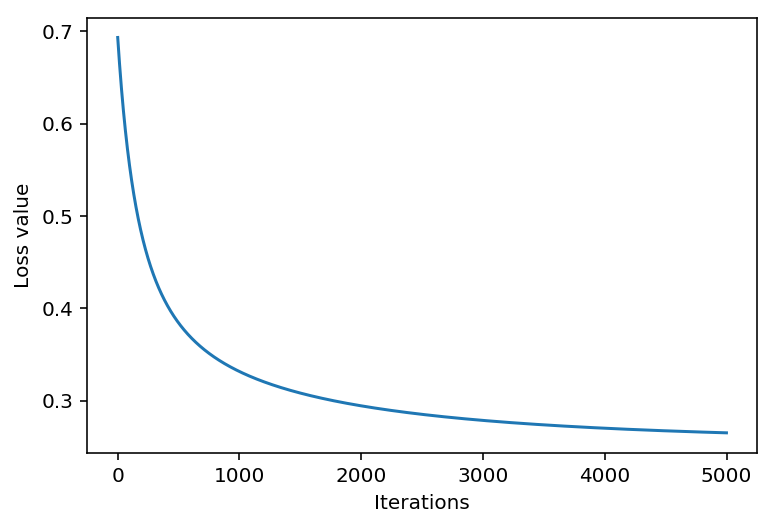

In [19]:
#YOUR CODE HERE


# construct the data matrix X
n = data.shape[0]
X = np.ones([n,3]) 
X[:,1:3] = data[:,0:2]
print(X.shape)
print(X[:5,:])

# parameters vector
w = np.array([0,0,0])[:,None] # [:,None] adds a singleton dimension
print(w.shape)


# run gradient descent algorithm
start = time.time()
w_init = w
tau = 1e-2; max_iter = 5000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


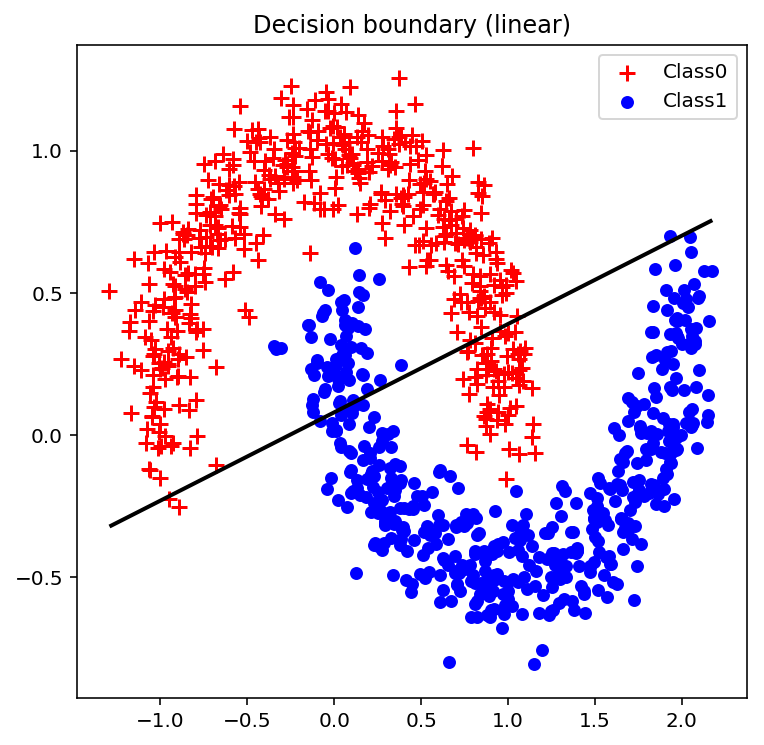

In [20]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()


## 2.3 Quadratic logistic regression/classification task.
<hr>


Implement the quadratic logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.255. <br>

(1000, 6)
[[ 1.00000000e+00  7.60900000e-01 -3.70100000e-02  5.78968810e-01
   1.36974010e-03 -2.81609090e-02]
 [ 1.00000000e+00  1.13638000e+00 -6.51000000e-03  1.29135950e+00
   4.23801000e-05 -7.39783380e-03]
 [ 1.00000000e+00  1.06430000e+00 -6.77300000e-02  1.13273449e+00
   4.58735290e-03 -7.20850390e-02]
 [ 1.00000000e+00  8.97760000e-01  9.08100000e-02  8.05973018e-01
   8.24645610e-03  8.15255856e-02]
 [ 1.00000000e+00  1.00726000e+00 -5.07400000e-02  1.01457271e+00
   2.57454760e-03 -5.11083724e-02]]
(6, 1)
Time= 0.2977769374847412
0.2628344866106736
[[ 0.36409124]
 [ 1.42998335]
 [-3.29988136]
 [ 0.06555273]
 [-1.31599127]
 [-1.01807864]]


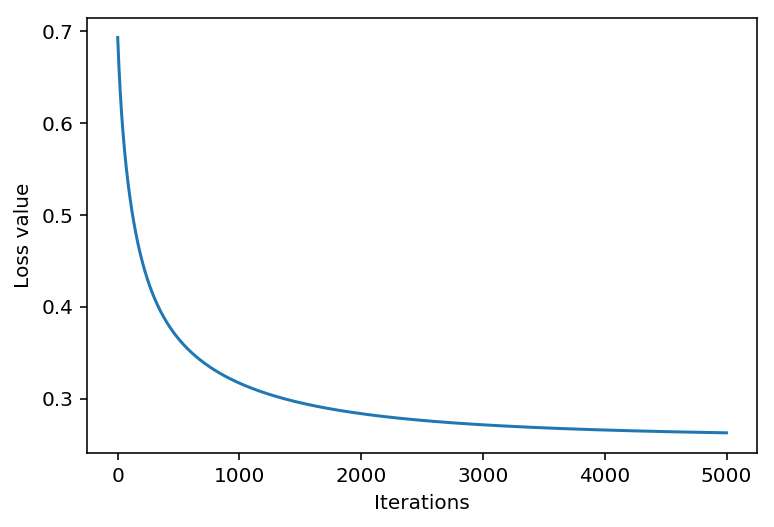

In [21]:
#YOUR CODE HERE
#YOUR CODE HERE


# construct the data matrix X
n = data.shape[0]
X = np.ones([n,6]) 
X[:,1:3] = data[:,0:2]
X[:,3] = data[:,0]**2
X[:,4] = data[:,1]**2
X[:,5] = data[:,0]*data[:,1]
print(X.shape)
print(X[:5,:])

# parameters vector
w = np.array([0,0,0,0,0,0])[:,None] # [:,None] adds a singleton dimension
print(w.shape)



# run gradient descent algorithm
start = time.time()
w_init = w
tau = 1e-2; max_iter = 5000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()



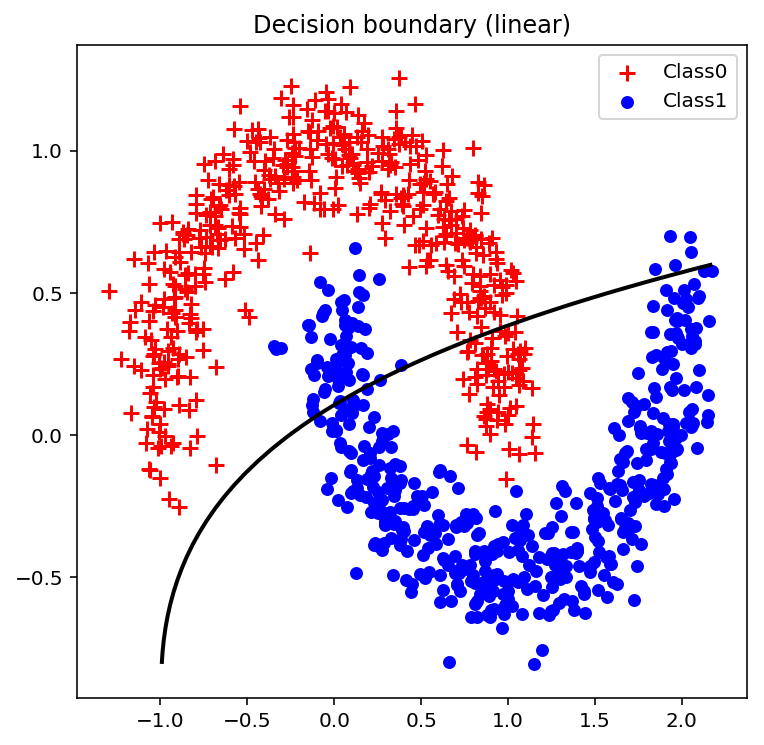

In [22]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),6]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = xx1.reshape(-1)**2
X2[:,4] = xx2.reshape(-1)**2
X2[:,5] = xx1.reshape(-1)*(xx2.reshape(-1))
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()


## 2.4 Cubic logistic regression/classification task.
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

In the case of **cubic** prediction, we have:

<br>
$$
X = 
\left[ 
\begin{array}{cccccccc}
1 & x_{1(1)} & x_{1(2)} & x_{1(1)}^2 & x_{1(2)}^2 & x_{1(1)}x_{1(2)} & x_{1(1)}^3 & x_{1(2)}^3 & x_{1(1)}^2x_{1(2)} & x_{1(1)}x_{1(2)}^2 \\ 
1 & x_{2(1)} & x_{2(2)} & x_{2(1)}^2 & x_{2(2)}^2 & x_{2(1)}x_{2(2)} & x_{2(1)}^3 & x_{2(2)}^3 & x_{2(1)}^2x_{2(2)} & x_{2(1)}x_{2(2)}^2\\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} & x_{n(1)}^2 & x_{n(2)}^2 & x_{n(1)}x_{n(2)} & x_{n(1)}^3 & x_{n(2)}^3 & x_{n(1)}^2x_{n(2)} & x_{n(1)}x_{n(2)}^2
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2\\ 
w_3\\ 
w_4\\ 
w_5\\ 
w_6\\ 
w_7\\ 
w_8\\ 
w_9
\end{array} 
\right]
\quad
$$

Implement the cubic logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.043. <br>

(1000, 10)
[[ 1.00000000e+00  7.60900000e-01 -3.70100000e-02  5.78968810e-01
   1.36974010e-03 -2.81609090e-02  4.40537368e-01 -5.06940811e-05
  -2.14276357e-02  1.04223524e-03]
 [ 1.00000000e+00  1.13638000e+00 -6.51000000e-03  1.29135950e+00
   4.23801000e-05 -7.39783380e-03  1.46747511e+00 -2.75894451e-07
  -8.40675037e-03  4.81598980e-05]
 [ 1.00000000e+00  1.06430000e+00 -6.77300000e-02  1.13273449e+00
   4.58735290e-03 -7.20850390e-02  1.20556932e+00 -3.10701412e-04
  -7.67201070e-02  4.88231969e-03]
 [ 1.00000000e+00  8.97760000e-01  9.08100000e-02  8.05973018e-01
   8.24645610e-03  8.15255856e-02  7.23570336e-01  7.48860678e-04
   7.31904097e-02  7.40333843e-03]
 [ 1.00000000e+00  1.00726000e+00 -5.07400000e-02  1.01457271e+00
   2.57454760e-03 -5.11083724e-02  1.02193851e+00 -1.30632545e-04
  -5.14794192e-02  2.59323882e-03]]
(10, 1)
Time= 5.725933074951172
0.029600003082064036
[[  4.89455113]
 [ -3.05829814]
 [ -5.79423094]
 [-10.48804739]
 [ -1.00841513]
 [ -2.06726937]
 [  

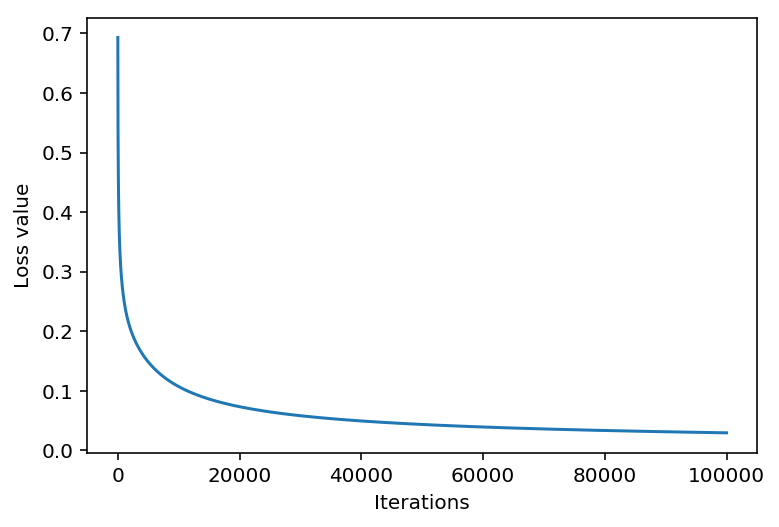

In [25]:
#YOUR CODE HERE
#YOUR CODE HERE
#YOUR CODE HERE


# construct the data matrix X
n = data.shape[0]
X = np.ones([n,10]) 
X[:,1:3] = data[:,0:2]
X[:,3] = data[:,0]**2
X[:,4] = data[:,1]**2
X[:,5] = data[:,0]*data[:,1]
X[:,6] = data[:,0]**3
X[:,7] = data[:,1]**3
X[:,8] = data[:,0]**2*data[:,1]
X[:,9] = data[:,0]*data[:,1]**2
print(X.shape)
print(X[:5,:])

# parameters vector
w = np.array([0,0,0,0,0,0,0,0,0,0])[:,None] # [:,None] adds a singleton dimension
print(w.shape)



# run gradient descent algorithm
start = time.time()
w_init = w
tau = 1e-2; max_iter = 100000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()




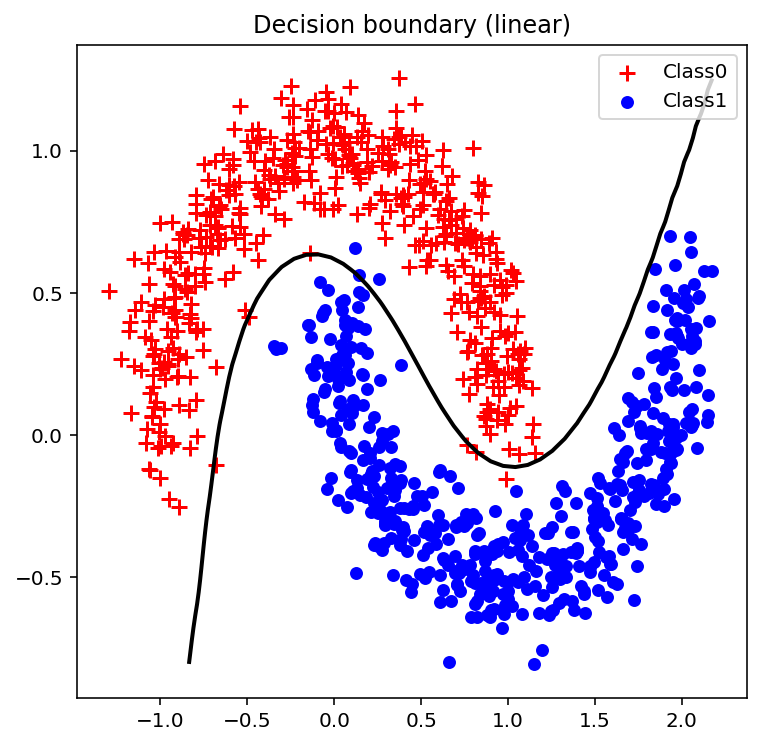

In [26]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),10]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = xx1.reshape(-1)**2
X2[:,4] = xx2.reshape(-1)**2
X2[:,5] = xx1.reshape(-1)*(xx2.reshape(-1))
X2[:,6] = xx1.reshape(-1)**3
X2[:,7] = xx2.reshape(-1)**3
X2[:,8] = xx1.reshape(-1)**2*(xx2.reshape(-1))
X2[:,9] = xx1.reshape(-1)*(xx2.reshape(-1)**2)
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()
